# Forbes Richest Athletes 

<img src="https://i.ytimg.com/vi/NPOdcCfyUnw/maxresdefault.jpg" width="700" height="500" />

**Data Dictionary**
1. Name: Name of the athlete.
2. Nationality: Name of the country the athlete belongs to.
3. Current Rank: Rank in the corresponding Year.
4. Previous Year Rank: Rank in in the preceding year.
5. Sport: Name of the sports that athlete played that year.
6. Year: Current year of ranking.
7. earnings ( million) : Earnings of the athlete in millions in the corresponding year. 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("deep")
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
df = pd.read_csv("Forbes+Richest+Athletes+1990-2019.csv")

In [4]:
df.head()

,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,Mike Tyson,USA,1,Not Listed,Boxing,1990,28.6
1,Buster Douglas,USA,2,Not Listed,Boxing,1990,26.0
2,Sugar Ray Leonard,USA,3,Not Listed,Boxing,1990,13.0
3,Ayrton Senna,Brazil,4,Not Listed,Auto Racing,1990,10.0
4,Alain Prost,France,5,Not Listed,Auto Racing,1990,9.0


In [5]:
df.isnull().sum()

Name                    0
Nationality             0
Current Rank            0
Previous Year Rank      0
Sport                   0
Year                    0
earnings ($ million)    0
dtype: int64

In [6]:
df.shape

(291, 7)

### Q1. Atheletes from which country have been listed most number of times in the Forbes Richest Athletes from 1990 to 2019?
[Hint: use countplot]

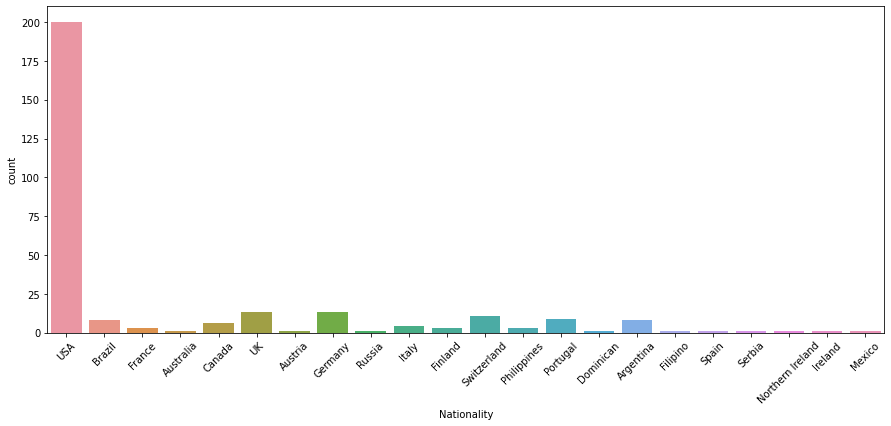

In [11]:
plt.figure(figsize=(15,6))
sns.countplot(df.Nationality)
plt.xticks(rotation=45)
plt.show()

### Q2. Make a plot visualizing year wise top earning (rank-1) athletes. In which year the rank 1 athlete earned the most? Which was the athlete who earned the most and what sport did he play? How much did the athlete earn?
[hint : use barplot]

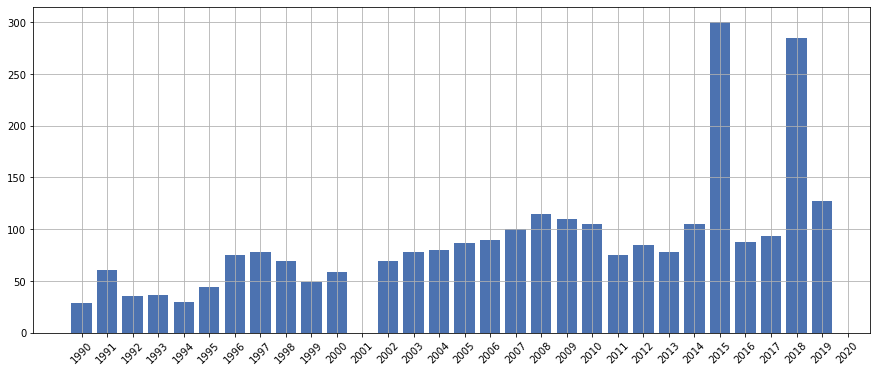

In [38]:
df1=df[df['Current Rank']==1]
l1=list(df1['earnings ($ million)'])
l2=list(df1.Year)
plt.figure(figsize=(15,6))
plt.bar(l2,l1)
plt.grid(True)
plt.xticks(np.arange(1990,2021),rotation=45)
plt.show()

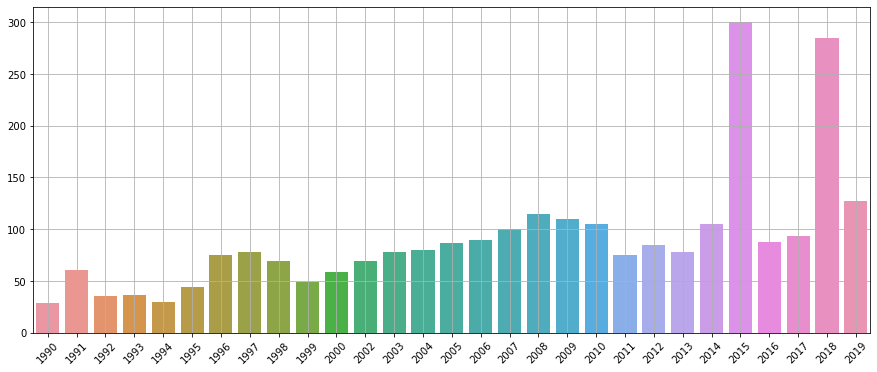

In [40]:
df1=df[df['Current Rank']==1]
l1=list(df1['earnings ($ million)'])
l2=list(df1.Year)
plt.figure(figsize=(15,6))
sns.barplot(l2,l1)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [42]:
df[(df.Year==2015)&(df['Current Rank']==1)]

,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
241,Floyd Mayweather,USA,1,1,Boxing,2015,300.0


### Q3. Which athlete has been most frequently ranked number 1 from 1990 to 2019? 
[Hint : use piechart]

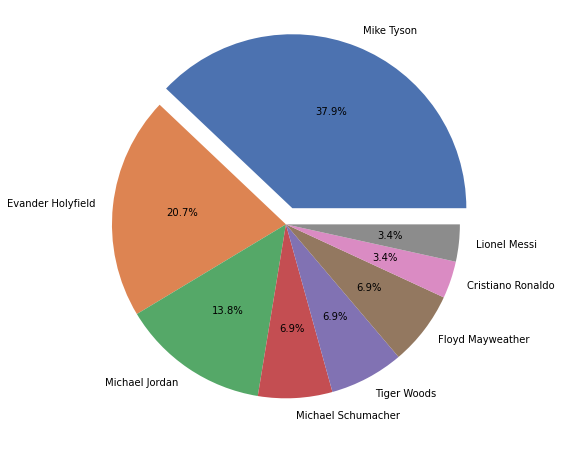

In [64]:
plt.figure(figsize=(15,8))
plt.pie(df[df['Current Rank']==1].Name.value_counts(),labels=df[df['Current Rank']==1].Name.unique(),explode=[0.1,0.0,0.0,0.0,
    0.0,0.0,0.0,0.0],autopct='%0.1f%%')
plt.show()

### Q4. Players from which 2 sports have been listed least number of times in the Forbes RIchest Athletes List?
[Hint : Use swarmplot]

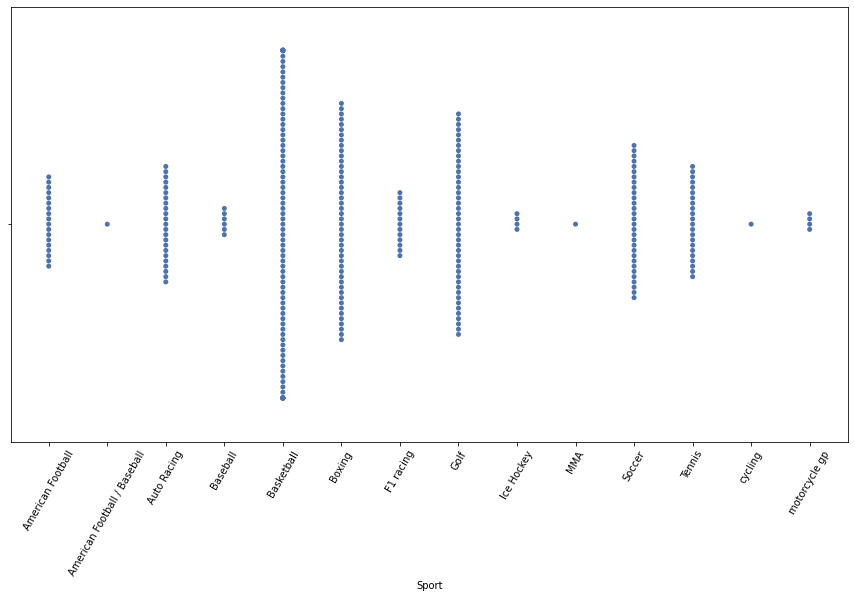

In [69]:
plt.figure(figsize=(15,8))
sns.swarmplot(df.Sport)
plt.xticks(rotation=60)
plt.show()

In [75]:
df.groupby('Sport').nunique().sort_values(by='Name').reset_index().iloc[[1,2],:]

,Sport,Name,Nationality,Current Rank,Previous Year Rank,Year,earnings ($ million)
1,MMA,1,1,1,1,1,1
2,cycling,1,1,1,1,1,1


### Q5. Discuss the relationship between Current rank and earnings with the help of a suitable plot.
[hint : use regplot]

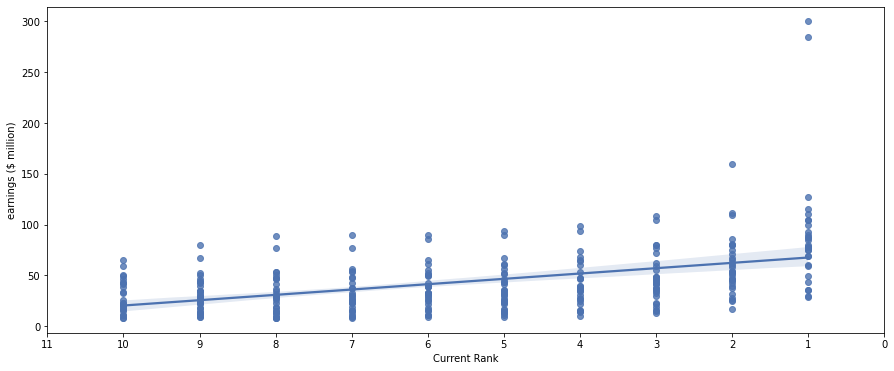

In [111]:
plt.figure(figsize=(15,6))
sns.regplot(df['Current Rank'],df['earnings ($ million)'])
plt.xticks(np.arange(0,12))
plt.gca().invert_xaxis()
plt.show()

### Q6. Which three sports have the highest spread in terms of earnings (highest IQR)?
[Hint : use boxplot]

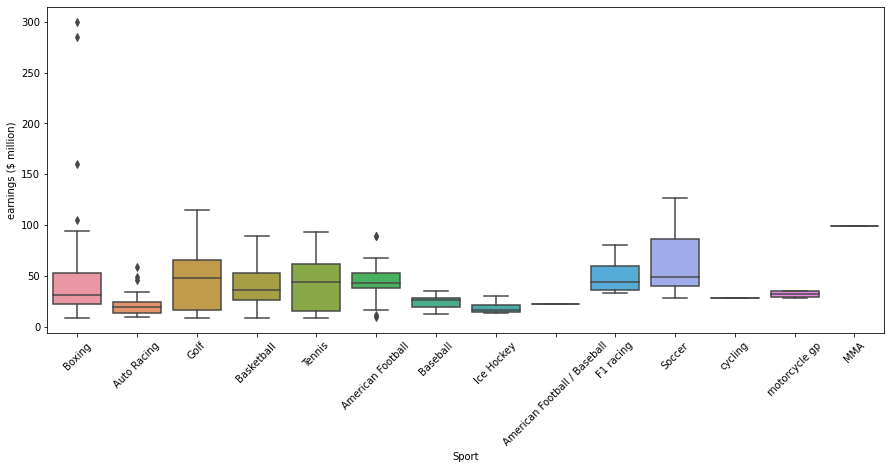

In [115]:
plt.figure(figsize=(15,6))
sns.boxplot(df.Sport,df['earnings ($ million)'])
plt.xticks(rotation=45)
plt.show()

### Q7. Show a trend in the positions at which Tiger Woods has appeared in the Forbes Richest Athletes list overs the years.
[Hint : Use lineplot]

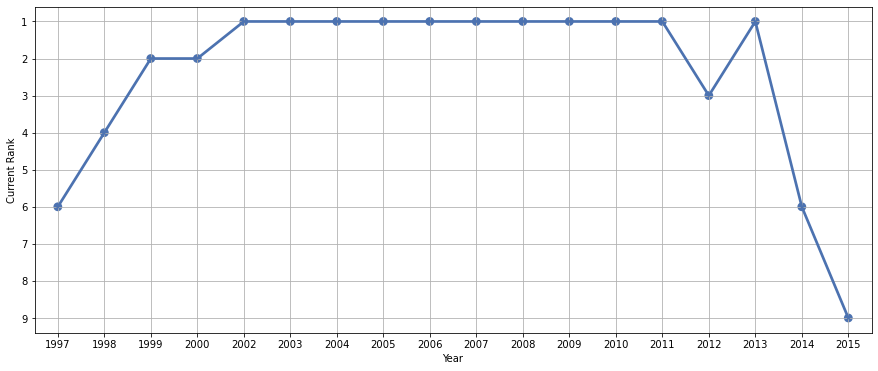

In [128]:
plt.figure(figsize=(15,6))
a1=df[df.Name=='Tiger Woods']
sns.pointplot(a1.Year,a1['Current Rank'])
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

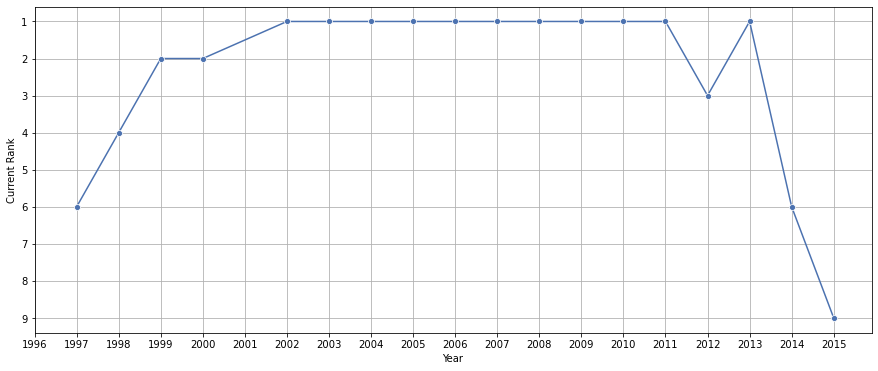

In [129]:
plt.figure(figsize=(15,6))
a1=df[df.Name=='Tiger Woods']
sns.lineplot(a1.Year,a1['Current Rank'],marker='o')
plt.gca().invert_yaxis()
plt.grid(True)
plt.xticks(range(1996,2016))
plt.show()

### Q8. Comment on the trend of the earnings of Tiger Woods overs the years.
[Hint : use lineplot]

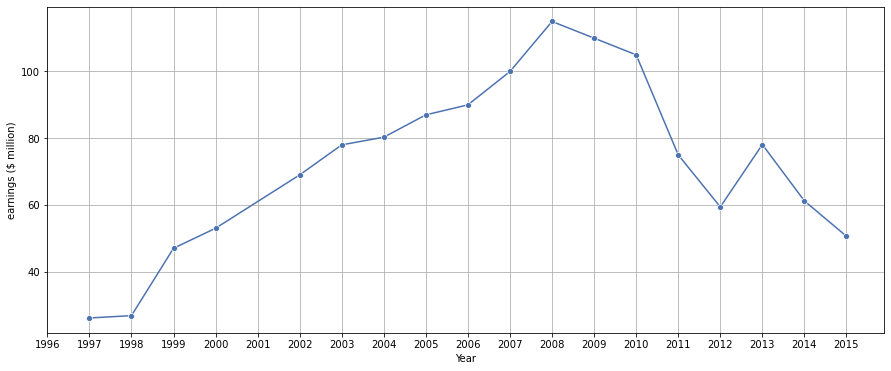

In [138]:
a1=df[df.Name=='Tiger Woods']
plt.figure(figsize=(15,6))
sns.lineplot(a1.Year,a1['earnings ($ million)'],marker='o')
plt.xticks(range(1996,2016))
plt.grid(True)
plt.show()

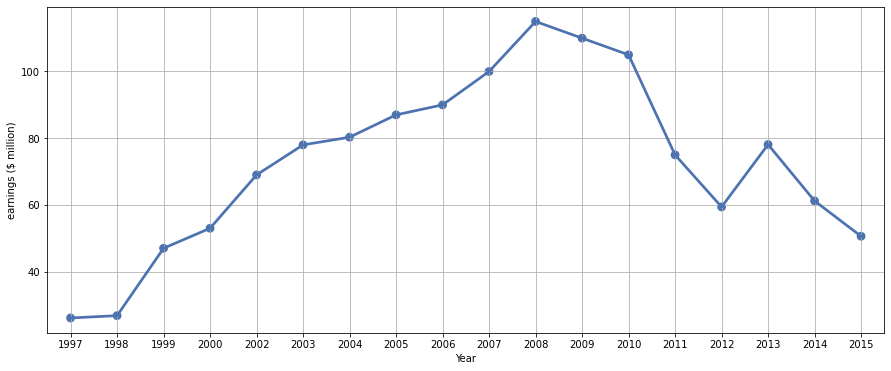

In [134]:
a1=df[df.Name=='Tiger Woods']
plt.figure(figsize=(15,6))
sns.pointplot(a1.Year,a1['earnings ($ million)'])
plt.grid(True)
plt.show()

### Q9. Display the distribution of the earnings of Tiger Woods. Comment on how the distribution looks like and interpret some insights from the plot.
[Hint : Use distplot]

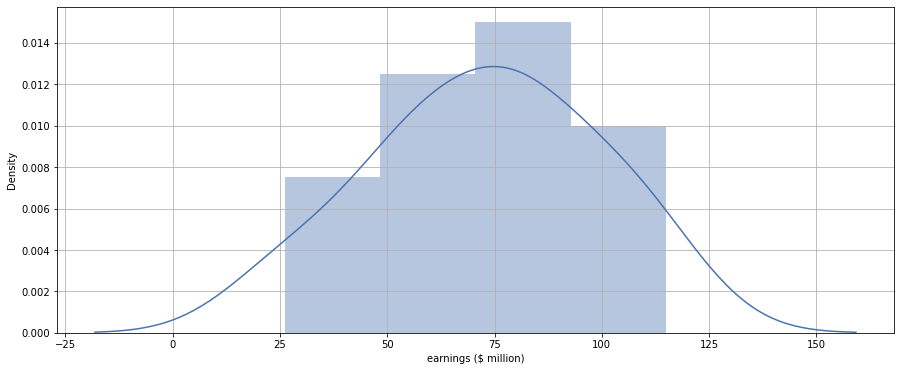

In [139]:
a1=df[df.Name=='Tiger Woods']
plt.figure(figsize=(15,6))
sns.distplot(a1['earnings ($ million)'])
plt.grid(True)
plt.show()

### Q10. Has the earnings of the richest athletes increased over the period of 30 years? Discuss the correlation between year and earnings.
[Hint : Use heatmap/scatterplot]

In [140]:
c1=df[['Year','earnings ($ million)']].corr()
c1

,Year,earnings ($ million)
Year,1.000000,0.638597
earnings ($ million),0.638597,1.000000


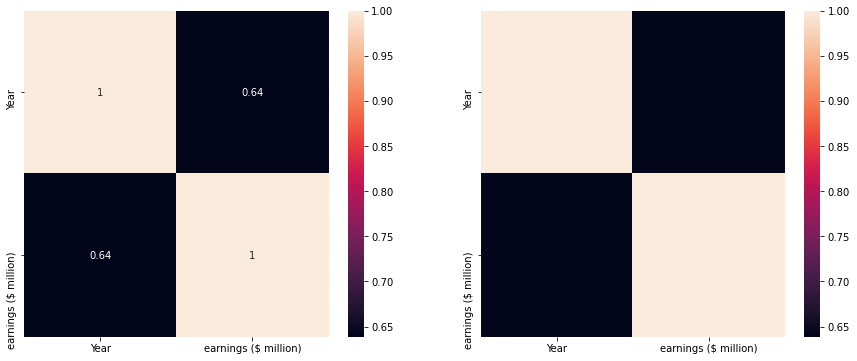

In [151]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.heatmap(c1,annot=True)
plt.subplot(1,2,2)
sns.heatmap(c1)
plt.show()

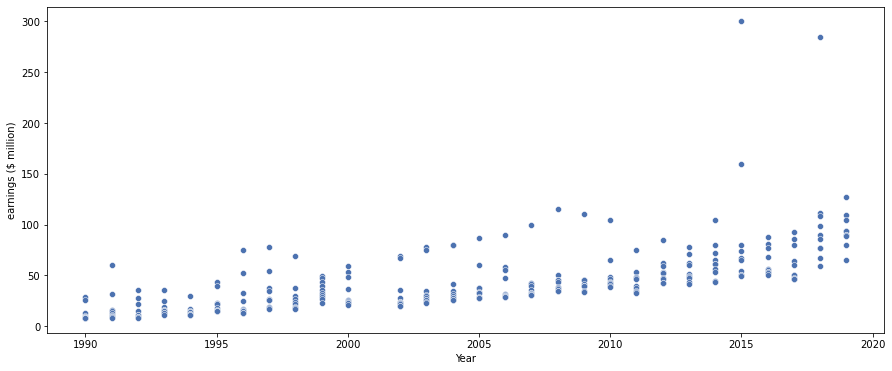

In [153]:
plt.figure(figsize=(15,6))
sns.scatterplot(df.Year,df['earnings ($ million)'])
plt.show()

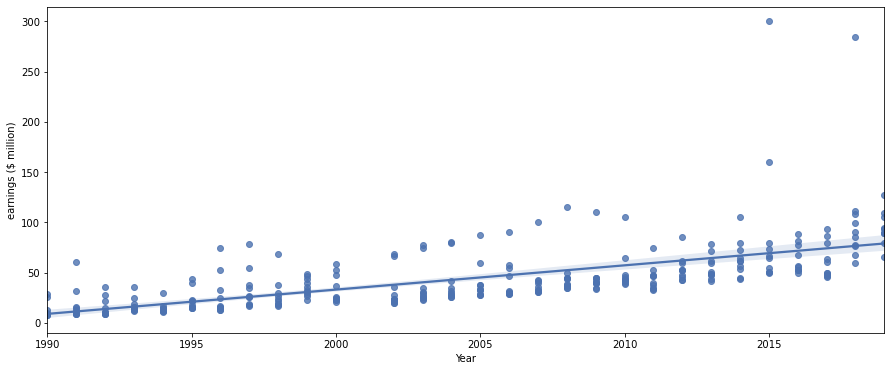

In [154]:
plt.figure(figsize=(15,6))
sns.regplot(df.Year,df['earnings ($ million)'])
plt.show()

### Q-11 Display the earnings trend over the years.
[Hint: use lineplot(), estimator = np.mean]

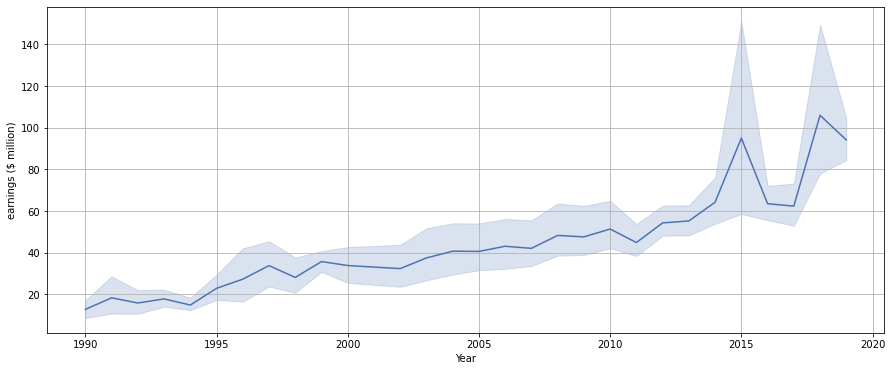

In [163]:
plt.figure(figsize=(15,6))
sns.lineplot(df.Year,df['earnings ($ million)'],estimator=np.mean)
plt.grid(True)
plt.show()

                                            **Happy Learning**